Original Dataset:
    Age   Salary  Experience    Bonus      Score  HoursWorked  Satisfaction
0  56.0  31542.0         6.0  13880.0  64.016822    31.475625      3.320994
1  46.0  51677.0        21.0      NaN  27.114744    56.826645      3.418037
2  32.0  76732.0        24.0  10516.0  59.281199    46.130327      7.390266
3  25.0  80343.0         1.0  15559.0  68.013193    54.634984      2.232634
4  38.0  69081.0        17.0      NaN  23.082919    64.284147      6.418600

Correlation Matrix with New Features:
                               Age    Salary  Experience     Bonus     Score  \
Age                       1.000000  0.018598    0.056511  0.077936 -0.060447   
Salary                    0.018598  1.000000    0.069514  0.051196 -0.048516   
Experience                0.056511  0.069514    1.000000  0.074856 -0.067911   
Bonus                     0.077936  0.051196    0.074856  1.000000 -0.025682   
Score                    -0.060447 -0.048516   -0.067911 -0.025682  1.000000   
HoursWo

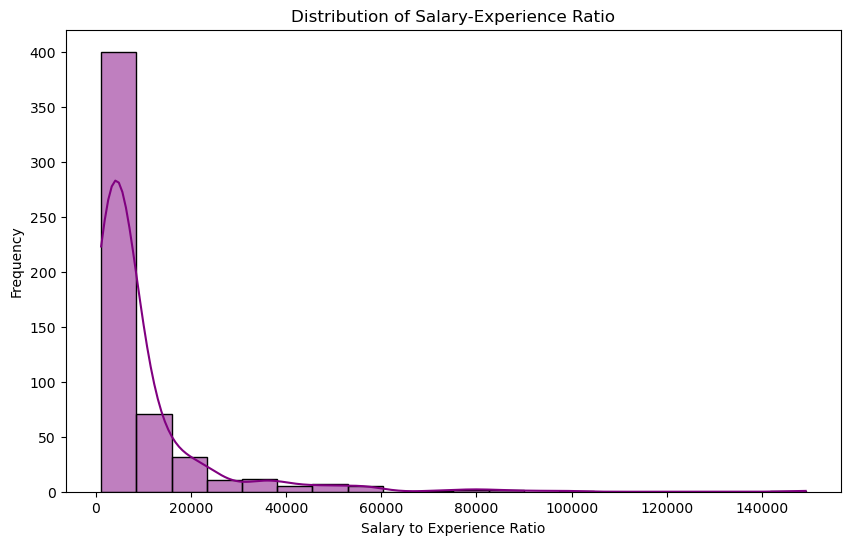

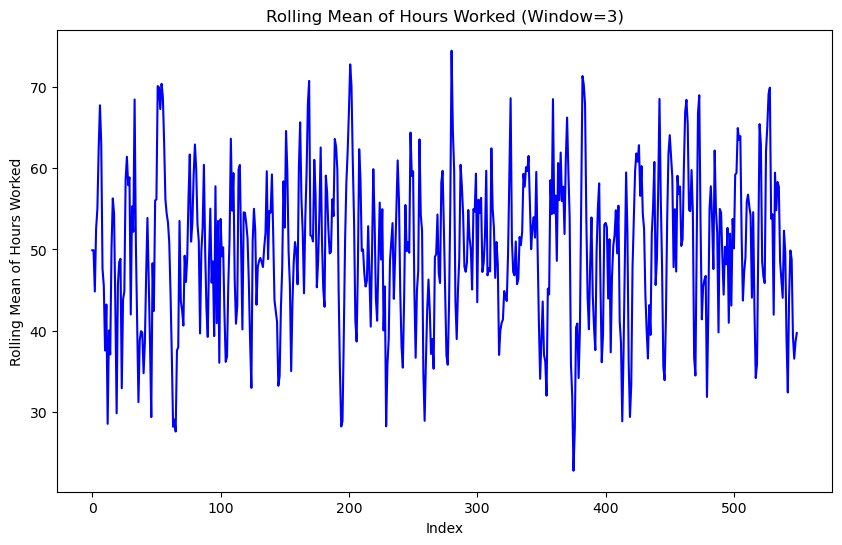


Processed Dataset with New Features:
    Age   Salary  Experience    Bonus      Score  HoursWorked  Satisfaction  \
0  56.0  31542.0         6.0  13880.0  64.016822    31.475625      3.320994   
1  46.0  51677.0        21.0  10507.5  27.114744    56.826645      3.418037   
2  32.0  76732.0        24.0  10516.0  59.281199    46.130327      7.390266   
3  25.0  80343.0         1.0  15559.0  68.013193    54.634984      2.232634   
4  38.0  69081.0        17.0  10507.5  23.082919    64.284147      6.418600   

   Salary_Experience_Ratio  Hours_Satisfaction_Ratio  Rolling_Hours_Mean  \
0              5257.000000                  9.477773           49.901453   
1              2460.809524                 16.625521           49.901453   
2              3197.166667                  6.242039           44.810866   
3             80343.000000                 24.471090           52.530652   
4              4063.588235                 10.015292           55.016486   

   Cumulative_Bonus  Experienc

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = ('Dataset.csv')  # Replace with the actual file path
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Original Dataset:")
print(df.head())

# Fill missing values - You can apply more advanced imputation strategies as needed
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Salary'] = df['Salary'].fillna(df['Salary'].median())
df['Experience'] = df['Experience'].fillna(df['Experience'].median())
df['Bonus'] = df['Bonus'].fillna(df['Bonus'].median())
df['Score'] = df['Score'].fillna(df['Score'].median())
df['HoursWorked'] = df['HoursWorked'].fillna(df['HoursWorked'].median())
df['Satisfaction'] = df['Satisfaction'].fillna(df['Satisfaction'].median())

# Create new features based on existing columns

## 1. Ratio of Salary to Experience (to represent how well paid an individual is based on experience)
df['Salary_Experience_Ratio'] = df['Salary'] / df['Experience']

## 2. Hours Worked per Week relative to Satisfaction (could indicate work-life balance)
df['Hours_Satisfaction_Ratio'] = df['HoursWorked'] / df['Satisfaction']

## 3. Rolling mean of 'HoursWorked' over the last 3 records (simulating how workload might evolve)
df['Rolling_Hours_Mean'] = df['HoursWorked'].rolling(window=3).mean().fillna(df['HoursWorked'].mean())

## 4. Cumulative sum of 'Bonus' as a new feature to track the accumulation of bonuses over time
df['Cumulative_Bonus'] = df['Bonus'].cumsum()

## 5. Time-based feature: Divide 'Experience' into categories (0-5 years: Junior, 6-15 years: Mid-level, 16+ years: Senior)
df['Experience_Level'] = pd.cut(df['Experience'], bins=[0, 5, 15, np.inf], labels=['Junior', 'Mid-level', 'Senior'])

# Encode 'Experience_Level' using LabelEncoder
label_encoder = LabelEncoder()
df['Experience_Level_Encoded'] = label_encoder.fit_transform(df['Experience_Level'])

# Drop the original categorical 'Experience_Level' column if no longer needed
df.drop('Experience_Level', axis=1, inplace=True)

# Check for any potential correlations between new features and target variables (hypothetical equipment failure)
correlation_matrix = df.corr()

# Display correlation of newly created features with other features
print("\nCorrelation Matrix with New Features:")
print(correlation_matrix)

# Visualizing important transformations
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the Salary-Experience Ratio
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary_Experience_Ratio'], bins=20, kde=True, color='purple')
plt.title('Distribution of Salary-Experience Ratio')
plt.xlabel('Salary to Experience Ratio')
plt.ylabel('Frequency')
plt.show()

# Visualizing the rolling mean of hours worked
plt.figure(figsize=(10, 6))
sns.lineplot(data=df['Rolling_Hours_Mean'], color='blue')
plt.title('Rolling Mean of Hours Worked (Window=3)')
plt.xlabel('Index')
plt.ylabel('Rolling Mean of Hours Worked')
plt.show()

# Save the modified dataset with new features
df.to_csv('dataset_with_features.csv', index=False)

print("\nProcessed Dataset with New Features:")
print(df.head())
